# EXPLORATORY DATA ANALYSIS FOR TITANIC DATA

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_csv('train.csv')

## EDA

In [3]:
df.sample(5)

PassengerId  Survived  Pclass                            Name     Sex  \
388          389         0       3            Sadlier, Mr. Matthew    male   
340          341         1       2  Navratil, Master. Edmond Roger    male   
327          328         1       2         Ball, Mrs. (Ada E Hall)  female   
603          604         0       3       Torber, Mr. Ernst William    male   
297          298         0       1    Allison, Miss. Helen Loraine  female   

      Age  SibSp  Parch  Ticket      Fare    Cabin Embarked  
388   NaN      0      0  367655    7.7292      NaN        Q  
340   2.0      1      1  230080   26.0000       F2        S  
327  36.0      0      0   28551   13.0000        D        S  
603  44.0      0      0  364511    8.0500      NaN        S  
297   2.0      1      2  113781  151.5500  C22 C26        S

In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

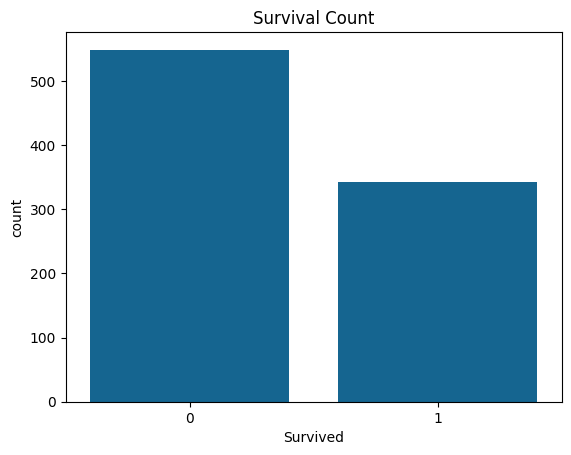

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

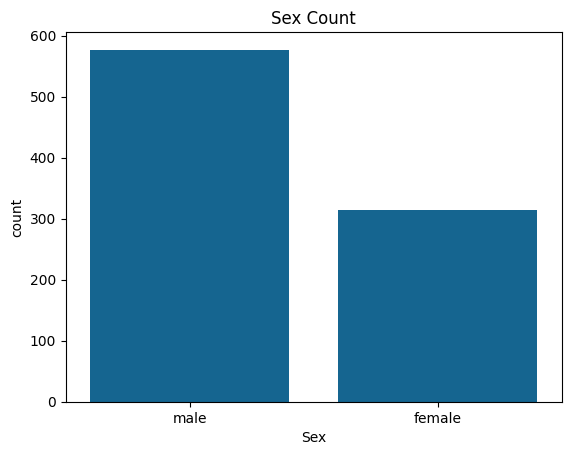

In [9]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Count')
plt.show()

In [10]:
pd.crosstab(df['Sex'], df['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

In [11]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815

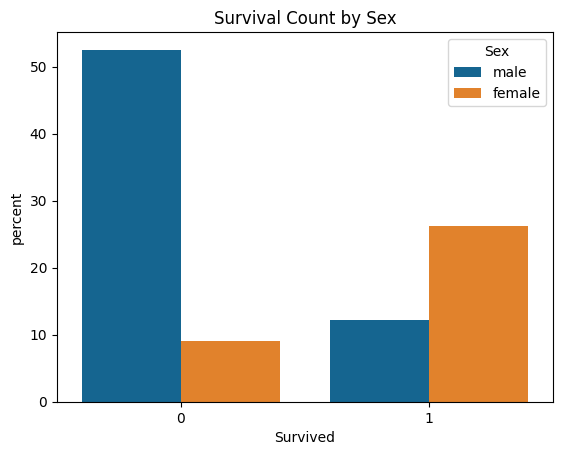

In [12]:
sns.countplot(x='Survived', data=df, hue='Sex', stat="percent")
plt.title('Survival Count by Sex')
plt.show()

The plot shows that relatively more females survived and the demise count of male is way higher than females. This can be due to the lower attendance of females than males but can also suggest that either more males lost lives trying to save the females or women have better survival skills. Through critical reasoning, the last reason appears more compelling to me.

In [13]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

In [14]:
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253

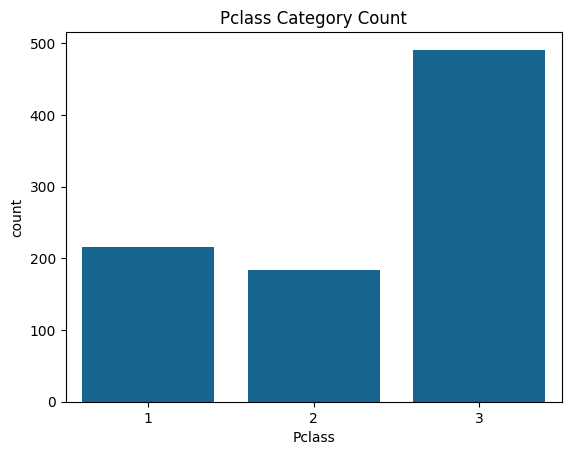

In [15]:
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Category Count')
plt.show()

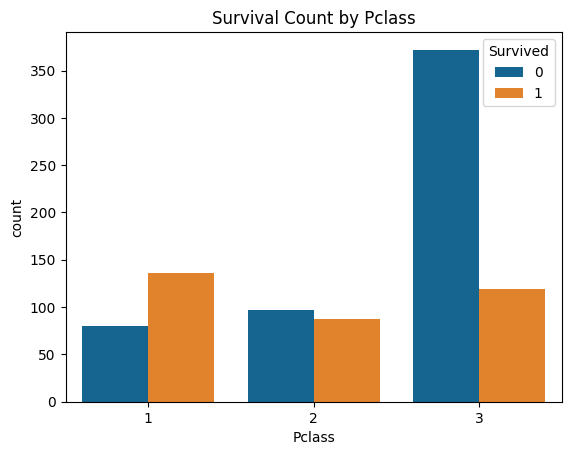

In [16]:
sns.countplot(x='Pclass', data=df, hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

The above analysis of Passenger Class and their survival rates shows that the passenger class was an important factor which decided whether the person would survive or not.

The titanic had 3 classes:
First: Elite, wealthy passengers having luxury accommodations.
Second: Middle class passengers having comfortable but lesser lavish  accommodations.
Third: Primarily passengers who were immigrants having limited amenities.

The class system determined the access to lifeboats hence we can see that the first class had highest survival rate, and mostly class-3 passengers lost lives with a survival of only 24%

In [17]:
print(pd.crosstab(df['Embarked'], df['Survived']))
print(pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100)

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Survived          0          1
Embarked                      
C         44.642857  55.357143
Q         61.038961  38.961039
S         66.304348  33.695652


The embarkation points do not have a significant affect on survival classification, with Q and S having almost similar survival rate and C having half surviors and half lives lost.

In [18]:
df.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [19]:
df['Log_fare'] = np.log1p(df['Fare'])

print(f"Count of fare 0: {df['Fare'].value_counts()[0.0]} ")

print(f"Maximum fare and  log of fare: {df['Fare'].max()} & {df['Log_fare'].max()}")
print(f"Minimum fare and log of fare: {df['Fare'].min()} & {df['Log_fare'].min()}")


Count of fare 0: 15 
Maximum fare and  log of fare: 512.3292 & 6.240917354759096
Minimum fare and log of fare: 0.0 & 0.0


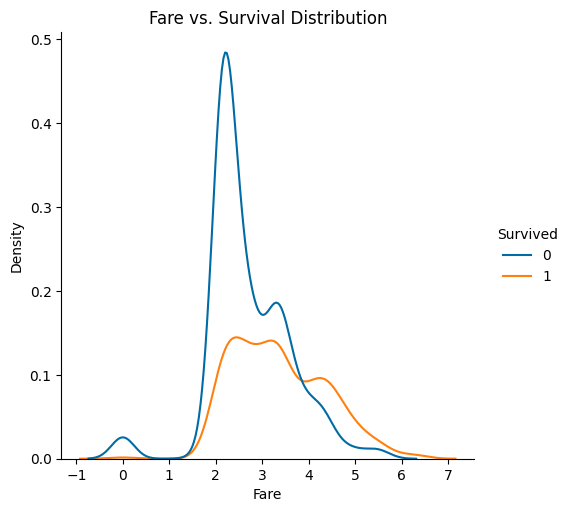

In [20]:
sns.displot(data=df, x='Log_fare', hue='Survived', kind = 'kde')
plt.title('Fare vs. Survival Distribution')
plt.xlabel('Fare')
plt.show()

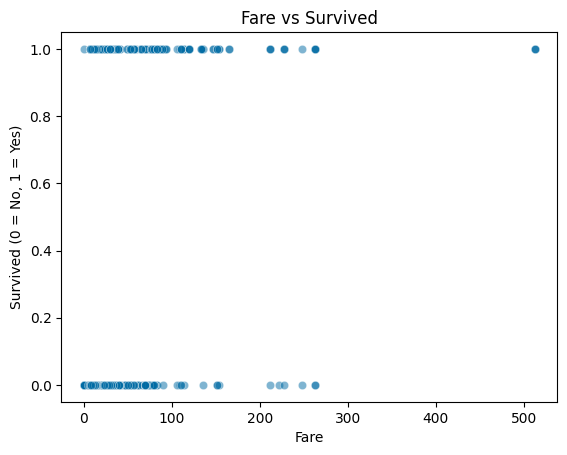

In [21]:
sns.scatterplot(data=df, x='Fare', y='Survived', alpha=0.5)
plt.title('Fare vs Survived')
plt.xlabel('Fare')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()

Fare does not seem to have a very strong affect on the survival rate hence we will not use it for our model

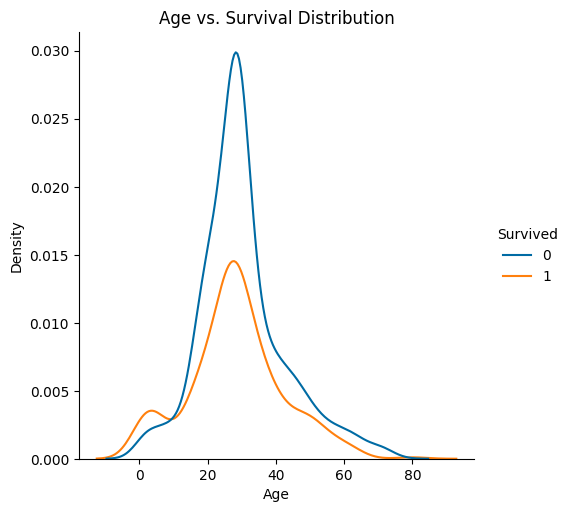

In [22]:
# filling missing ages with median based on sex i.e filling the missing female ages with 
# the median of female ages and same for males.
df['Age'] = df.groupby(['Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

sns.displot(data=df, x='Age', hue='Survived', kind = 'kde')
plt.title('Age vs. Survival Distribution')
plt.xlabel('Age')
plt.show()

We can see that the people from ages around 18 to 40 have a lower survival rate which makes sense because these are relatively stronger people and probably died trying to save others

In [23]:
# Creating new column family by adding SibSp and Parch

df['Family'] = df['SibSp'] + df['Parch']

Maximum Family Size: 10
Minimum Family Size: 0


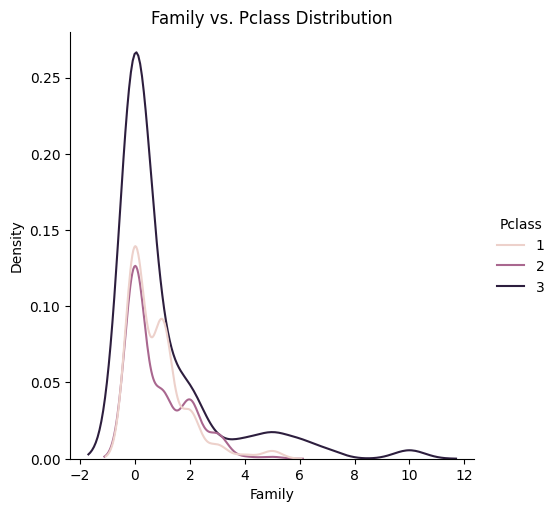

In [24]:
print(f"Maximum Family Size: {df['Family'].max()}")
print(f"Minimum Family Size: {df['Family'].min()}")

sns.displot(data=df, x='Family', hue='Pclass', kind = 'kde')
plt.title('Family vs. Pclass Distribution')
plt.xlabel('Family')
plt.show()

From the graph its obvious that people with large families i.e. >6 were in Pclass, which was the cheapest one.

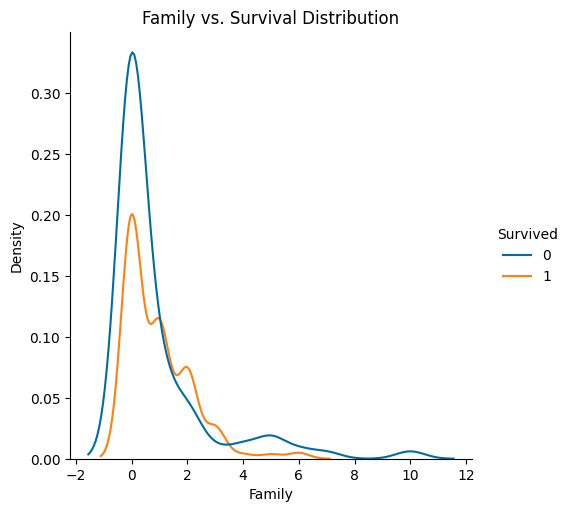

In [25]:
sns.displot(data=df, x='Family', hue='Survived', kind = 'kde')
plt.title('Family vs. Survival Distribution')
plt.xlabel('Family')
plt.show()

In [26]:
top_10_percent = df['Family'].quantile(0.90)

# Filter rows where faimly size is in the top 10%
large_family_group = df[df['Family'] >= top_10_percent]

# Check survival rate in this group
survival_rate = large_family_group['Survived'].mean() * 100
print(f"Survival rate for top 10% family sizes: {survival_rate:.2f}%")

Survival rate for top 10% family sizes: 34.07%


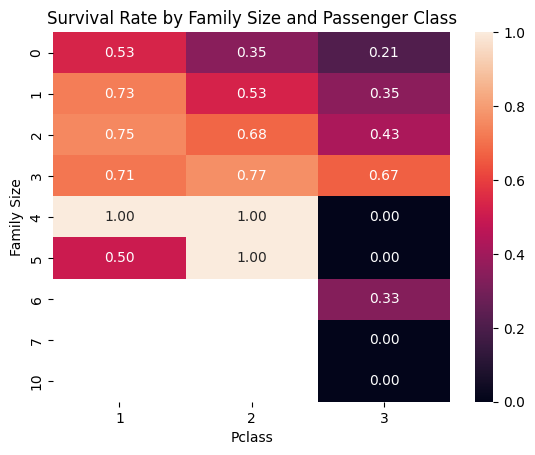

In [27]:
pivot = df.pivot_table(values='Survived', index='Family', columns='Pclass', aggfunc='mean')

# Plot heatmap
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title('Survival Rate by Family Size and Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

We found two things: First, most large families were in third class (Pclass 3). Second, they had a low survival rate. This means being in lower class reduced the overall chances of survival, and because the families were big, they likely prioritized helping one another during the crisis, which may have further decreased their likelihood of survival.

The feature Cabin has 687 missing values hence we do not need to analyze it.
Also we do not need to work on high cardinality columns which obviously do not have any affect on the survival rate, such as Passengerid, Name, Ticket.

We are finally done with EDA and we can move on to train a model which will estimate whether a person will survive titanic or not based on features such as Sex, Passenger Class, Family Size, and Age. We’ve chosen not to include Fare as a feature, as Passenger Class already captures much of the same information.

In [28]:
from sklearn.model_selection import train_test_split

# converting string values of sex to numerical
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

X = df[["Pclass","Sex","Age","Family"]] #Features
y = df["Survived"] #Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

First, we'll try using logistic regression and check accuracy and then move on to RandomForestClassifier, and compare the accuracies of both models.

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
# Evaluation metrics

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100}%")

Model Accuracy: 81.00558659217877%


Now, trying Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
# Evaluation metrics

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100}%")

Model Accuracy: 83.24022346368714%


We can see that the Random Forest Classifier has slightly higher accuracy than logistic regression because Random Forest can model non-linear interactions and is more flexible than Logistic Regression 

### Conclusion

We have finished exploring the data and trained our models to predict Titanic survival. Random Forest performed slightly better than Logistic Regression. It’s exciting to see how these features can help estimate survival, and I look forward to improving and deploying the model.